# Java Stream

Java 8 API添加了一个新的抽象称为流Stream，可以让你以一种声明的方式处理数据。  
Stream 使用一种类似用 SQL 语句从数据库查询数据的直观方式来提供一种对 Java 集合运算和表达的高阶抽象。  
Stream API可以极大提高Java程序员的生产力，让程序员写出高效率、干净、简洁的代码。  
这种风格将要处理的元素集合看作一种流， 流在管道中传输， 并且可以在管道的节点上进行处理， 比如筛选， 排序，聚合等。  
元素流在管道中经过中间操作（intermediate operation）的处理，最后由最终操作(terminal operation)得到前面处理的结果。  

---
## 什么是 Stream？
Stream（流）是一个来自数据源的元素队列并支持聚合操作

- 元素是特定类型的对象，形成一个队列。 Java中的Stream并不会存储元素，而是按需计算。
- 数据源 流的来源。 可以是集合，数组，I/O channel， 产生器generator 等。
- 聚合操作 类似SQL语句一样的操作， 比如filter, map, reduce, find, match, sorted等。

和以前的Collection操作不同， Stream操作还有两个基础的特征：

- Pipelining: 中间操作都会返回流对象本身。 这样多个操作可以串联成一个管道， 如同流式风格（fluent style）。 这样做可以对操作进行优化， 比如延迟执行(laziness)和短路( short-circuiting)。
- 内部迭代： 以前对集合遍历都是通过Iterator或者For-Each的方式, 显式的在集合外部进行迭代， 这叫做外部迭代。 Stream提供了内部迭代的方式， 通过访问者模式(Visitor)实现。

---
## 基本语法
![基本语法](stream_img/stream.jpg)

### 集合生成流
在 Java 8 中, 集合接口有两个方法来生成流：
```Java
stream() − 为集合创建串行流。
parallelStream() − 为集合创建并行流。
```
例如:
```Java
List<String> list = new ArrayList<>();
Stream<String> stream = list.stream();
Stream<String> stringStream = list.parallelStream();
```

### 数组生成流
通过 `Arrays.stram()`，或通过`Stream.of()`
例如
```Java
Stream<String> stream1 = Arrays.stream(new String[10]);
Stream<Integer> stream2 = Stream.of(1, 2, 3);
```

### 生成无限流
1. 通过`Stream.iterate()`生成无限流
```Java
Stream<Integer> iterate = Stream.iterate(0, (x) -> x + 2);
iterate.limit(10).forEach(System.out::println);
```
2. 通过`Stream.generate()`
```Java
Stream<Double> generate = Stream.generate(() -> Math.random());
generate.forEach(System.out::println);
```


In [2]:
// 例1：
// 生成10个0-100的随机数
import java.util.stream.*;
Stream.generate(() -> (int)(Math.random()*100)).limit(10).forEach(x -> System.out.print(x + "  "));

44  24  0  42  50  53  41  89  3  74  

---
### 转换Stream
有4种方式
- distinct
- filter
- map
- flatMap

#### 转换(1): distinct 
对于Stream中包含的元素进行去重操作（去重逻辑依赖元素的equals方法），新生成的Stream中没有重复的元素；
![distinct](stream_img/distinct.jpg)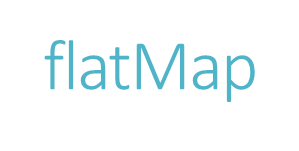

In [11]:
// 例2：
// 生成15个0-10的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*10)).limit(15).collect(Collectors.toList());
System.out.println(data);
// 去掉重复元素
List<Integer> data2 = data.stream().distinct().collect(Collectors.toList());
System.out.println(data2);


[3, 4, 7, 7, 7, 4, 1, 7, 2, 5, 7, 0, 4, 0, 5]
[3, 4, 7, 1, 2, 5, 0]


#### 转换(2): filter 
对于Stream中包含的元素使用给定的过滤函数进行过滤操作，新生成的Stream只包含符合条件的元素；
![filter](stream_img/filter.jpg)

In [12]:
// 例2：生成15个0-10的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*10)).limit(15).collect(Collectors.toList());
System.out.println(data);
// 找出大于5的元素
List<Integer> data2 = data.stream().filter(x -> x>5).collect(Collectors.toList());
System.out.println(data2);

[0, 5, 4, 4, 3, 3, 8, 5, 6, 9, 2, 1, 7, 6, 8]
[8, 6, 9, 7, 6, 8]


#### 转换(3): map 
对于Stream中包含的元素使用给定的转换函数进行转换操作，新生成的Stream只包含转换生成的元素。 
![map](stream_img/map.jpg)

In [15]:
// 例3：
// 生成15个0-10的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*10)).limit(15).collect(Collectors.toList());
System.out.println(data);
// 计算data中每个数的平方
List<Integer> data2 = data.stream().map(x -> x*x).collect(Collectors.toList());
System.out.println(data2);

[6, 6, 7, 5, 3, 1, 1, 5, 3, 9, 3, 0, 0, 5, 6]
[36, 36, 49, 25, 9, 1, 1, 25, 9, 81, 9, 0, 0, 25, 36]


#### 转换(4): flatMap 
对于Stream中包含的元素使用给定的转换函数进行转换操作，新生成的Stream只包含转换生成的元素。 
![flatMap](stream_img/flatMap.jpg)

In [17]:
// 例4：生成5个0-10的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*10)).limit(5).collect(Collectors.toList());
System.out.println(data);
// 计算data中的数不变，再加入每个数的平方
List<Integer> data2 = data.stream().flatMap(x -> Stream.of(x, x*x)).collect(Collectors.toList());
System.out.println(data2);

[2, 7, 3, 3, 0]
[2, 4, 7, 49, 3, 9, 3, 9, 0, 0]


#### 转换(5): peek 
生成一个包含原Stream的所有元素的新Stream，同时会提供一个消费函数（Consumer实例），新Stream每个元素被消费的时候都会执行给定的消费函数
![peek](stream_img/peek.jpg)

In [18]:
// 例5：
// 生成5个0-10的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*10)).limit(5).collect(Collectors.toList());
System.out.println(data);
// 计算data中的数不变，再加入每个数的平方
List<Integer> data2 = data.stream().peek(x -> x*x).collect(Collectors.toList());
System.out.println(data2);

[6, 9, 7, 0, 6]


CompilationException: 

#### 转换(6): limit 
对一个Stream进行截断操作，获取其前N个元素，如果原Stream中包含的元素个数小于N，那就获取其所有的元素；
![limit](stream_img/limit.jpg)

#### 转换(7): skip 
返回一个丢弃原Stream的前N个元素后剩下元素组成的新Stream，如果原Stream中包含的元素个数小于N，那么返回空Stream；
![skip](stream_img/skip.jpg)

In [22]:
// 例6：
// 生成1-15
int n=1;
List<Integer> data = Stream.generate(() -> n++).limit(15).collect(Collectors.toList());
System.out.println(data);
// 从第5个开始，取5个元素
List<Integer> data2 = data.stream().skip(5).limit(5).collect(Collectors.toList());
System.out.println(data2);

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[6, 7, 8, 9, 10]


#### 转换(8): sorted 
sorted方法将对原Stream进行排序，返回一个有序列的新Stream。sorterd有两种变体sorted()，sorted(Comparator)，前者将默认使用Comparator进行排序，而后者接受一个自定义排序规则函数(Comparator)，可按照意愿排序。

In [3]:
// 例7：
// 生成5个0-15的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*15)).limit(5).collect(Collectors.toList());
System.out.println(data);
// 按默认规则排序
List<Integer> data2 = data.stream().sorted().collect(Collectors.toList());
System.out.println("按默认规则排序");
System.out.println(data2);
// 按逆序排序，自定义规则
List<Integer> data3 = data.stream().sorted((n1, n2) -> n2-n1).collect(Collectors.toList());
System.out.println("按自定义规则排序");
System.out.println(data3);

[9, 9, 10, 6, 0]
按默认规则排序
[0, 6, 9, 9, 10]
按自定义规则排序
[10, 9, 9, 6, 0]


---
### 聚合（Reduce）Stream
汇聚操作（也称为折叠）接受一个元素序列为输入，反复使用某个合并操作，把序列中的元素合并成一个汇总的结果。比如查找一个数字列表的总和或者最大值，或者把这些数字累积成一个`List`对象。`Stream`接口有一些通用的汇聚操作，比如`reduce()`和`collect()`；也有一些特定用途的汇聚操作，比如`sum()`,`max()`和`count()`。

#### 可变汇聚
可变汇聚对应的只有一个方法：`collect`，正如其名字显示的，它可以把`Stream`中的要有元素收集到一个结果容器中（比如Collection）
![collect](stream_img/collect.png)

In [13]:
// 例8：
// 生成1-5
int n=1;
List<Integer> data = Stream.generate(() -> n++).limit(5).collect(Collectors.toList());
System.out.println(data);
// map
Map<Integer, Integer> dmap = data.stream().collect(Collectors.toMap(x->x, x->x*x));
System.out.println(dmap);
// set
Set<Integer> dset = data.stream().collect(Collectors.toSet());
System.out.println(dset);

[1, 2, 3, 4, 5]
{1=1, 2=4, 3=9, 4=16, 5=25}
[1, 2, 3, 4, 5]


### reduce
reduce方法非常的通用，后面介绍的count，sum等都可以使用其实现。

In [22]:
// 例，实现求和
// 生成1-10
int n=1;
List<Integer> data = Stream.generate(() -> n++).limit(10).collect(Collectors.toList());
System.out.println(data);
int sum = data.stream().reduce((s, x) -> x+s).get();
System.out.println("sum = " + sum);
// 或
sum = data.stream().reduce(0, (s, x) -> x+s);
System.out.println("sum = " + sum);

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sum = 55
sum = 55


In [17]:
// 例，实现求积
// 生成1-10
int p = data.stream().reduce(1, (f, x) -> x*f);
System.out.println("积 = " + p);

积 = 3628800


### 其它汇聚

- `forEach`：替代for循环
- `count`：计算个数
- `allMatch`：是不是Stream中的所有元素都满足给定的匹配条件
- `anyMatch`：Stream中是否存在任何一个元素满足匹配条件
- `findFirst`: 返回Stream中的第一个元素，如果Stream为空，返回空Optional
- `noneMatch`：是不是Stream中的所有元素都不满足给定的匹配条件
- `max`和`min`：使用给定的比较器（Operator），返回Stream中的最大|最小值


### 字符串join

In [27]:
// 生成1-10
int n=1;
List<Integer> data = Stream.generate(() -> n++).limit(10).collect(Collectors.toList());
System.out.println(data);
// 拼接
String s = data.stream().map(x -> String.valueOf(x)).collect(Collectors.joining("; ", "【", "】"));
System.out.println(s);

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
【1; 2; 3; 4; 5; 6; 7; 8; 9; 10】


### 统计
另外，一些产生统计结果的收集器也非常有用。它们主要用于int、double、long等基本类型上，它们可以用来产生类似如下的统计结果。

In [28]:
// 生成10个0-15的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*15)).limit(10).collect(Collectors.toList());
System.out.println(data);

IntSummaryStatistics stats = data.stream().mapToInt((x) -> x).summaryStatistics();
 
System.out.println("列表中最大的数 : " + stats.getMax());
System.out.println("列表中最小的数 : " + stats.getMin());
System.out.println("所有数之和 : " + stats.getSum());
System.out.println("平均数 : " + stats.getAverage());


[1, 9, 2, 3, 0, 14, 6, 10, 13, 10]
列表中最大的数 : 14
列表中最小的数 : 0
所有数之和 : 68
平均数 : 6.8


### 分组
使用`Collectors.groupingBy()`生成的收集器，对元素做group操作时用到。

In [34]:
// 生成10个0-15的随机数
List<Integer> data = Stream.generate(() -> (int)(Math.random()*15)).limit(10).collect(Collectors.toList());
System.out.println(data);

System.out.println("按奇偶分组");
Map<Boolean, List<Integer>> gd = data.stream().collect(Collectors.groupingBy(x-> x % 2==0, Collectors.toList()));
System.out.println(gd);

System.out.println("按奇偶分组, 并计数");
Map<Boolean, Long> gd = data.stream().collect(Collectors.groupingBy(x-> x % 2==0, Collectors.counting()));
System.out.println(gd);

System.out.println("按奇偶分组, 并求和");
Map<Boolean, Integer> gd = data.stream().collect(Collectors.groupingBy(x-> x % 2==0, Collectors.summingInt(x -> x)));
System.out.println(gd);

System.out.println("按奇偶分组, 并计算平均值");
Map<Boolean, Double> gd = data.stream().collect(Collectors.groupingBy(x-> x % 2==0, Collectors.averagingInt(x -> x)));
System.out.println(gd);


[3, 6, 12, 5, 4, 11, 4, 10, 3, 8]
按奇偶分组
{false=[3, 5, 11, 3], true=[6, 12, 4, 4, 10, 8]}
按奇偶分组, 并计数
{false=4, true=6}
按奇偶分组, 并求和
{false=22, true=44}
按奇偶分组, 并计算平均值
{false=5.5, true=7.333333333333333}
